Problem Statement - 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

Results Expected
A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation.
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 

You need to submit the following four components:

Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
Word File: Answer all the questions asked by the company in the word document provided.
Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
PDF File: Write the summary report in a word file and submit it as a PDF.
 
Downloads
All the files required for the case study are given in the following zip file.

In [2]:
import pandas as pd
import numpy as np

#### Load the dataset

In [3]:
data = pd.read_csv("Leads.csv")

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
data.columns = ['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
 'do_not_email', 'do_not_call', 'converted', 'total_visits',
 'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
 'country', 'specialization', 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
 'newspaper_article', 'x_education_forums', 'newspaper',
 'digital_advertisement', 'through_recommendations',
 'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
 'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
 'lead_profile', 'city', 'asymmetrique_activity_index',
 'asymmetrique_profile_index', 'asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview', 'last_notable_activity']


In [7]:
data.shape

(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   prospect_id                                    9240 non-null   object 
 1   lead_number                                    9240 non-null   int64  
 2   lead_origin                                    9240 non-null   object 
 3   lead_source                                    9204 non-null   object 
 4   do_not_email                                   9240 non-null   object 
 5   do_not_call                                    9240 non-null   object 
 6   converted                                      9240 non-null   int64  
 7   total_visits                                   9103 non-null   float64
 8   total_time_spent_on_website                    9240 non-null   int64  
 9   page_views_per_visit                           9103 

In [9]:
data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [10]:
data.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
data[['asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score']].head()

,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score
0,02.Medium,02.Medium,15.0,15.0
1,02.Medium,02.Medium,15.0,15.0
2,02.Medium,01.High,14.0,20.0
3,02.Medium,01.High,13.0,17.0
4,02.Medium,01.High,15.0,18.0


In [12]:
data.groupby(['converted','asymmetrique_activity_index']).size()

converted  asymmetrique_activity_index
0          01.High                         576
           02.Medium                      2209
           03.Low                          329
1          01.High                         245
           02.Medium                      1630
           03.Low                           33
dtype: int64

In [13]:
data.groupby(['converted','asymmetrique_profile_index']).size()

converted  asymmetrique_profile_index
0          01.High                       1158
           02.Medium                     1940
           03.Low                          16
1          01.High                       1045
           02.Medium                      848
           03.Low                          15
dtype: int64

As the asymmetrique_activity_index, asymmetrique_profile_index - is not clearly defined, and the distribution of their individual groups is not showing any clear segments - we can drop this

In [14]:
# filtering out irrelevant columns for analysis like prospect_id, lead_number - which is a unique identifier that does not affect the lead score


df = data[['lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_score', 'asymmetrique_profile_score', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity', 'converted']]

In [15]:
df.head()

,lead_origin,lead_source,do_not_email,do_not_call,total_visits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,...,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity,converted
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,Select,...,No,No,Select,Select,15.0,15.0,No,No,Modified,0
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,Select,...,No,No,Select,Select,15.0,15.0,No,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,...,No,No,Potential Lead,Mumbai,14.0,20.0,No,Yes,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,...,No,No,Select,Mumbai,13.0,17.0,No,No,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,Select,...,No,No,Select,Mumbai,15.0,18.0,No,No,Modified,1


In [16]:
import pandas as pd

for column in df.select_dtypes(include='object').columns:
    print(f"{column} Categories count - {len(df[column].unique())}")

lead_origin Categories count - 5
lead_source Categories count - 22
do_not_email Categories count - 2
do_not_call Categories count - 2
last_activity Categories count - 18
country Categories count - 39
specialization Categories count - 20
how_did_you_hear_about_x_education Categories count - 11
what_is_your_current_occupation Categories count - 7
what_matters_most_to_you_in_choosing_a_course Categories count - 4
search Categories count - 2
magazine Categories count - 1
newspaper_article Categories count - 2
x_education_forums Categories count - 2
newspaper Categories count - 2
digital_advertisement Categories count - 2
through_recommendations Categories count - 2
receive_more_updates_about_our_courses Categories count - 1
tags Categories count - 27
lead_quality Categories count - 6
update_me_on_supply_chain_content Categories count - 1
get_updates_on_dm_content Categories count - 1
lead_profile Categories count - 7
city Categories count - 8
i_agree_to_pay_the_amount_through_cheque Catego

all cols with only 1 categorical value, can be excluded from correlation analysis - as there is no variation

In [17]:
single_category_cols = ['i_agree_to_pay_the_amount_through_cheque','get_updates_on_dm_content', 'update_me_on_supply_chain_content', 'receive_more_updates_about_our_courses','magazine',  ]

Checking columns with high null counts

In [18]:
df.info() # checking non-null counts from 9240 total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    9240 non-null   object 
 1   lead_source                                    9204 non-null   object 
 2   do_not_email                                   9240 non-null   object 
 3   do_not_call                                    9240 non-null   object 
 4   total_visits                                   9103 non-null   float64
 5   total_time_spent_on_website                    9240 non-null   int64  
 6   page_views_per_visit                           9103 non-null   float64
 7   last_activity                                  9137 non-null   object 
 8   country                                        6779 non-null   object 
 9   specialization                                 7802 

In [19]:
# Print null count of each column
null_counts = df.isnull().sum()
null_counts

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
total_visits                                      137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                                           0
digital_advertisement       

As mentioned in the question, data points with 'select' values - must also be viewed as null values, as drop down fields that takes a predefined set of categorical values 
in forms - will by default be set to Select - instructing the users to select an option from the list - thus by itself denotes an empty value

In [20]:
df = df.replace(['select', 'Select'], [None, None])

In [21]:
# Print null count of each column
null_counts = df.isnull().sum()
null_counts

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
total_visits                                      137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
how_did_you_hear_about_x_education               7250
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                                           0
digital_advertisement       

specialization, how_did_you_hear_about_x_education - significantly increase, after replacing 'select' entries with null

In [22]:
meta_df = pd.merge(df.dtypes.reset_index(), null_counts.reset_index(), on= 'index')
meta_df.columns = ['attribute', 'dtype', 'null_count']


In [23]:
high_freq_null_cat_cols = list(meta_df.loc[((meta_df['dtype'] == 'object')|(meta_df['null_count']>1000)), 'attribute'].to_numpy())
high_freq_null_cat_cols

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'last_activity',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'tags',
 'lead_quality',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'lead_profile',
 'city',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

As there are many string type categorical_columns - to decide which should be included in the analysis - we check the correlation with target variable - 'converter'

we use cramer's v to check the association with 'converter' and if the correlation is strong - we include them in preliminary analysis

###  Cramér's V:

Interpretation:

V = 0: No association.
0 < V < 0.1: Weak association.
0.1 <= V < 0.3: Moderate association.
0.3 <= V < 0.5: Strong association.
V >= 0.5: Very strong association.


In [24]:
from scipy.stats import chi2_contingency
cramers_coefficient = []
# Create a contingency table
print(f"Cramér's V")
high_freq_null_cat_cols
for col in df.columns:
    contingency_table = pd.crosstab(df['converted'], df[col])

    # Perform the chi-square test for independence
    chi2, _, _, _ = chi2_contingency(contingency_table)
    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramers_coefficient.append({'col': col,'value': v})
    


Cramér's V


/var/folders/5p/k025km096tndpdfzbd0mhr8c0000gn/T/ipykernel_35487/4156849469.py:13: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
/var/folders/5p/k025km096tndpdfzbd0mhr8c0000gn/T/ipykernel_35487/4156849469.py:13: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
/var/folders/5p/k025km096tndpdfzbd0mhr8c0000gn/T/ipykernel_35487/4156849469.py:13: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
/var/folders/5p/k025km096tndpdfzbd0mhr8c0000gn/T/ipykernel_35487/4156849469.py:13: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
/var/folders/5p/k025km096tndpdfzbd0mhr8c0000gn/T/ipykernel_35487/4156849469.py:13: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


In [25]:
cat_corr_df = pd.DataFrame(cramers_coefficient)
cat_corr_df.loc[((cat_corr_df['value']>=0.5)|(cat_corr_df['value']<=-0.5))]


,col,value
5,total_time_spent_on_website,0.615267
21,tags,0.933534
22,lead_quality,0.659945
25,lead_profile,0.539347
32,converted,0.999772


In [26]:
cat_corr_df.loc[cat_corr_df['value'].isnull()==True,'col'].to_numpy()

array(['magazine', 'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'i_agree_to_pay_the_amount_through_cheque'], dtype=object)

In [27]:
df.groupby(['magazine', 'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'i_agree_to_pay_the_amount_through_cheque'], dropna=False).size()

magazine  receive_more_updates_about_our_courses  update_me_on_supply_chain_content  get_updates_on_dm_content  i_agree_to_pay_the_amount_through_cheque
No        No                                      No                                 No                         No                                          9240
dtype: int64

clearly ['magazine', 'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'i_agree_to_pay_the_amount_through_cheque']  - cols only have 1 value and can be removed

Strong to moderately correlated with 'converted' class  -  ```tags, lead_quality, total_time_spent_on_website, lead_profile```

### Point-Biserial Correlation Coefficient:

Interpretation:

r = 0: No correlation.
0 < r < 0.1: Weak correlation.
0.1 <= r < 0.3: Moderate correlation.
0.3 <= r < 0.5: Strong correlation.
r >= 0.5: Very strong correlation.


For P-Value, generally p-value < 0.05 implies the correlation is statistically significant

In [28]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

analysis_df = df.copy()
pointbiserialr_dict = []
# Initialize LabelEncoder
label_encoder = LabelEncoder()
print(f"Point-Biserial Correlation for ")
# Iterate over categorical columns
for col in df.columns:
    # Use label encoding to convert strings to numeric values
    analysis_df[col] = label_encoder.fit_transform(analysis_df[col])
    
    # Calculate point-biserial correlation
    correlation, p_value = pointbiserialr(analysis_df['converted'], analysis_df[col])

    print(f"{col}: {correlation}")
    pointbiserialr_dict.append({'col': col, 'correlation': correlation})
    # print(f"P-Value for {col}: {p_value}") 
pointbiserialr_df = pd.DataFrame(pointbiserialr_dict)

Point-Biserial Correlation for 
lead_origin: 0.2237246844699315
lead_source: 0.1806024714315296
do_not_email: -0.13558033576518402
do_not_call: 0.018581294489187574
total_visits: 0.0926324022810913
total_time_spent_on_website: 0.3594653606058068
page_views_per_visit: 0.030744012270987497
last_activity: 0.24707523981776106
country: 0.05623483867710549
specialization: -0.14551657655340744
how_did_you_hear_about_x_education: -0.0855971203854077
what_is_your_current_occupation: -0.23156473312980677
what_matters_most_to_you_in_choosing_a_course: -0.32935037509521237
search: -0.0022608714978630652
magazine: nan
newspaper_article: 0.0034649746194834142
x_education_forums: -0.008238299356505992
newspaper: -0.00823829935650515
digital_advertisement: -0.00578926489968575
through_recommendations: 0.01860742945372032
receive_more_updates_about_our_courses: nan
tags: 0.00623337568269327
lead_quality: -0.530143729611865
update_me_on_supply_chain_content: nan
get_updates_on_dm_content: nan
lead_profi

/Users/varshinibalaji/Documents/DSProjects/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/varshinibalaji/Documents/DSProjects/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/varshinibalaji/Documents/DSProjects/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/varshinibalaji/Documents/DSProjects/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/scipy/stats/_s

In [29]:
pointbiserialr_df.loc[((pointbiserialr_df['correlation']>=0.5)&(pointbiserialr_df['correlation']<=0.5))]

,col,correlation


```
p-value can't be used here as label encoder can be misleading the values with numeric labels # TODO check
which may create an artificial sense of order or magnitude that does not necessarily reflect the true relationship between categories.
The p-value is dependent on the assumption that the variables being compared are continuous and normally distributed. 
When you use label encoding for categorical variables, you might violate these assumptions, and 
the p-value may not accurately reflect the statistical significance of the relationship.
```





In [30]:
correlation_activity = df['asymmetrique_activity_score'].corr(df['converted'])
correlation_profile = df['asymmetrique_profile_score'].corr(df['converted'])

print(f"Correlation with 'asymmetrique_activity_score': {correlation_activity}")
print(f"Correlation with 'asymmetrique_profile_score': {correlation_profile}")


Correlation with 'asymmetrique_activity_score': 0.16796168715266496
Correlation with 'asymmetrique_profile_score': 0.2185711166992058


also 'lead_origin', 'lead_source'  - are unique identifiers not relevant to correlation analysism

Strong to moderate correlation - ```lead_quality, lead_profile, what_matters_most_to_you_in_choosing_a_course```

In [31]:
cols_to_remove = ['lead_origin', 'lead_source'] + ['asymmetrique_activity_score',
       'asymmetrique_profile_score'] + single_category_cols + list(set(high_freq_null_cat_cols) - set(['tags', 'total_time_spent_on_website', 'lead_quality', 'lead_profile', 'what_matters_most_to_you_in_choosing_a_course']))
cols_to_remove

['lead_origin',
 'lead_source',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score',
 'i_agree_to_pay_the_amount_through_cheque',
 'get_updates_on_dm_content',
 'update_me_on_supply_chain_content',
 'receive_more_updates_about_our_courses',
 'magazine',
 'update_me_on_supply_chain_content',
 'do_not_email',
 'receive_more_updates_about_our_courses',
 'newspaper',
 'digital_advertisement',
 'last_notable_activity',
 'how_did_you_hear_about_x_education',
 'search',
 'country',
 'specialization',
 'asymmetrique_profile_score',
 'city',
 'asymmetrique_activity_score',
 'through_recommendations',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'x_education_forums',
 'lead_source',
 'newspaper_article',
 'what_is_your_current_occupation',
 'magazine',
 'last_activity',
 'get_updates_on_dm_content',
 'lead_origin',
 'do_not_call']

In [32]:
list(set(df.columns) - set(cols_to_remove))

['lead_profile',
 'tags',
 'converted',
 'lead_quality',
 'page_views_per_visit',
 'total_visits',
 'what_matters_most_to_you_in_choosing_a_course',
 'total_time_spent_on_website']

In [33]:
analysis_df = df[list(set(df.columns) - set(cols_to_remove))]
analysis_df.shape

(9240, 8)

```
Variables	Description
Prospect ID	A unique ID with which the customer is identified.
Lead Number	A lead number assigned to each lead procured.
Lead Origin	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
Lead Source	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
Do Not Email	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted	The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits	The total number of visits made by the customer on the website.
Total Time Spent on Website	The total time spent by the customer on the website.
Page Views Per Visit	Average number of pages on the website viewed during the visits.
Last Activity	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
Country	The country of the customer.
Specialization	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
How did you hear about X Education	The source from which the customer heard about X Education.
What is your current occupation	Indicates whether the customer is a student, umemployed or employed.
What matters most to you in choosing this course	An option selected by the customer indicating what is their main motto behind doing this course.
Search	Indicating whether the customer had seen the ad in any of the listed items.
Magazine	
Newspaper Article	
X Education Forums	
Newspaper	
Digital Advertisement	
Through Recommendations	Indicates whether the customer came in through recommendations.
Receive More Updates About Our Courses	Indicates whether the customer chose to receive more updates about the courses.
Tags	Tags assigned to customers indicating the current status of the lead.
Lead Quality	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
Update me on Supply Chain Content	Indicates whether the customer wants updates on the Supply Chain Content.
Get updates on DM Content	Indicates whether the customer wants updates on the DM Content.
Lead Profile	A lead level assigned to each customer based on their profile.
City	The city of the customer.
Asymmetrique Activity Index	An index and score assigned to each customer based on their activity and their profile
Asymmetrique Profile Index	
Asymmetrique Activity Score	
Asymmetrique Profile Score	
I agree to pay the amount through cheque	Indicates whether the customer has agreed to pay the amount through cheque or not.
a free copy of Mastering The Interview	Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
Last Notable Activity	The last notable acitivity performed by the student.

```


In [34]:
undescribed_cols  = ['newspaper_article', 'newspaper', 'x_education_forums']

In [35]:
analysis_df.columns

Index(['lead_profile', 'tags', 'converted', 'lead_quality',
       'page_views_per_visit', 'total_visits',
       'what_matters_most_to_you_in_choosing_a_course',
       'total_time_spent_on_website'],
      dtype='object')

In [36]:
analysis_df = analysis_df[['what_matters_most_to_you_in_choosing_a_course',
       'total_visits', 'lead_profile', 'tags', 'total_time_spent_on_website',
       'page_views_per_visit', 'lead_quality', 'converted']]

analysis_df.head()

,what_matters_most_to_you_in_choosing_a_course,total_visits,lead_profile,tags,total_time_spent_on_website,page_views_per_visit,lead_quality,converted
0,Better Career Prospects,0.0,None,Interested in other courses,0,0.0,Low in Relevance,0
1,Better Career Prospects,5.0,None,Ringing,674,2.5,NaN,0
2,Better Career Prospects,2.0,Potential Lead,Will revert after reading the email,1532,2.0,Might be,1
3,Better Career Prospects,1.0,None,Ringing,305,1.0,Not Sure,0
4,Better Career Prospects,2.0,None,Will revert after reading the email,1428,1.0,Might be,1


In [37]:
df.groupby(undescribed_cols).size()

newspaper_article  newspaper  x_education_forums
No                 No         No                    9237
                   Yes        No                       1
Yes                No         No                       1
                              Yes                      1
dtype: int64

In [38]:
df.groupby('newspaper').size()

newspaper
No     9239
Yes       1
dtype: int64

In [39]:
df.groupby('x_education_forums').size()

x_education_forums
No     9239
Yes       1
dtype: int64

as there is only 1 instance of another class - 'newspaper', 'x_education_forums' - can also be dropped 

In [40]:
try:
    del analysis_df['newspaper']
except KeyError:
    pass
try:
    del analysis_df['x_education_forums']
except KeyError:
    pass

In [41]:
analysis_df.head()

,what_matters_most_to_you_in_choosing_a_course,total_visits,lead_profile,tags,total_time_spent_on_website,page_views_per_visit,lead_quality,converted
0,Better Career Prospects,0.0,None,Interested in other courses,0,0.0,Low in Relevance,0
1,Better Career Prospects,5.0,None,Ringing,674,2.5,NaN,0
2,Better Career Prospects,2.0,Potential Lead,Will revert after reading the email,1532,2.0,Might be,1
3,Better Career Prospects,1.0,None,Ringing,305,1.0,Not Sure,0
4,Better Career Prospects,2.0,None,Will revert after reading the email,1428,1.0,Might be,1


In [42]:
analysis_df.isnull().sum()

what_matters_most_to_you_in_choosing_a_course    2709
total_visits                                      137
lead_profile                                     6855
tags                                             3353
total_time_spent_on_website                         0
page_views_per_visit                              137
lead_quality                                     4767
converted                                           0
dtype: int64

In [43]:
analysis_df.groupby(['lead_quality', 'converted'], dropna=False).size()

lead_quality       converted
High in Relevance  0              34
                   1             603
Low in Relevance   0             106
                   1             477
Might be           0             381
                   1            1179
Not Sure           0             826
                   1             266
Worst              0             589
                   1              12
NaN                0            3743
                   1            1024
dtype: int64

Missing Lead quality records can be set - Not Sure - as it represents the ambiguity of lead quality in None values

In [44]:
analysis_df.loc[analysis_df['lead_quality'].isnull()==True, 'lead_quality'] = 'Not Sure'

analysis_df.groupby(['lead_quality', 'converted'], dropna=False).size()

lead_quality       converted
High in Relevance  0              34
                   1             603
Low in Relevance   0             106
                   1             477
Might be           0             381
                   1            1179
Not Sure           0            4569
                   1            1290
Worst              0             589
                   1              12
dtype: int64

In [45]:
analysis_df.groupby(['lead_profile', 'converted'], dropna=False).size()

lead_profile                 converted
Dual Specialization Student  1              20
Lateral Student              0               1
                             1              23
Other Leads                  0             307
                             1             180
Potential Lead               0             346
                             1            1267
Student of SomeSchool        0             232
                             1               9
NaN                          0            4793
                             1            2062
dtype: int64

cases where lead_quality is missing - nothing can be inferred about the lead_profile type - here, using 'other leads' as default would be wrong, as that would imply that the lead's profile is not one of the other options - which is definitively excluding, while we can't be sure, as these are simply cases without user's responsem

In [46]:
analysis_df.groupby(['what_matters_most_to_you_in_choosing_a_course', 'converted'], dropna=False).size()

what_matters_most_to_you_in_choosing_a_course  converted
Better Career Prospects                        0            3338
                                               1            3190
Flexibility & Convenience                      0               1
                                               1               1
Other                                          0               1
NaN                                            0            2339
                                               1             370
dtype: int64

cases where what_matters_most_to_you_in_choosing_a_course is missing - nothing can be inferred about the lead_profile type - here, using 'Other' as default would be wrong, as that would imply that the lead's profile is not one of the other options - which is definitively excluding, while we can't be sure, as these are simply cases without user's response

In [47]:
analysis_df.groupby(['tags', 'converted'], dropna=False).size()

tags                                               converted
Already a student                                  0             462
                                                   1               3
Busy                                               0              81
                                                   1             105
Closed by Horizzon                                 0               2
                                                   1             356
Diploma holder (Not Eligible)                      0              62
                                                   1               1
Graduation in progress                             0             104
                                                   1               7
In confusion whether part time or DLP              0               4
                                                   1               1
Interested  in full time MBA                       0             114
                                          

though - null values in lead_quality can be replaced with 'Not Sure' - it still represents ambiguity in what lead_quality can be inferred, and could potentially be one of the other lead_quality values.

clearly, lead_profile, lead_quality - both these columns have high no. of null values, and null values are distributed between both converted and not converted instances

what_matters_most_to_you_in_choosing_a_course, tags - though null values are observed mainly with NaNs, the distribution of converted type in it has similar distributions of converted type for other only significant non-values - what_matters_most_to_you_in_choosing_a_course

In [48]:
analysis_df.columns

Index(['what_matters_most_to_you_in_choosing_a_course', 'total_visits',
       'lead_profile', 'tags', 'total_time_spent_on_website',
       'page_views_per_visit', 'lead_quality', 'converted'],
      dtype='object')

In [49]:
del analysis_df['lead_profile']
del analysis_df['lead_quality']
del analysis_df['what_matters_most_to_you_in_choosing_a_course']
del analysis_df['tags']

In [50]:
cols_with_missing = ['lead_profile', 'lead_quality', 'what_matters_most_to_you_in_choosing_a_course', 'tags']

In [51]:
analysis_cols = list(analysis_df.columns)+['what_matters_most_to_you_in_choosing_a_course', 'tags']
analysis_cols

['total_visits',
 'total_time_spent_on_website',
 'page_views_per_visit',
 'converted',
 'what_matters_most_to_you_in_choosing_a_course',
 'tags']

In [52]:
df[analysis_cols].head()

,total_visits,total_time_spent_on_website,page_views_per_visit,converted,what_matters_most_to_you_in_choosing_a_course,tags
0,0.0,0,0.0,0,Better Career Prospects,Interested in other courses
1,5.0,674,2.5,0,Better Career Prospects,Ringing
2,2.0,1532,2.0,1,Better Career Prospects,Will revert after reading the email
3,1.0,305,1.0,0,Better Career Prospects,Ringing
4,2.0,1428,1.0,1,Better Career Prospects,Will revert after reading the email


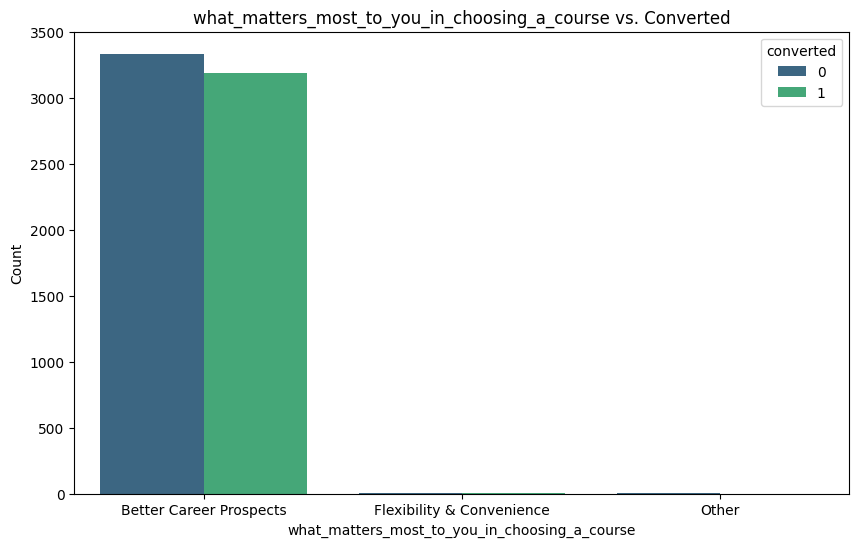

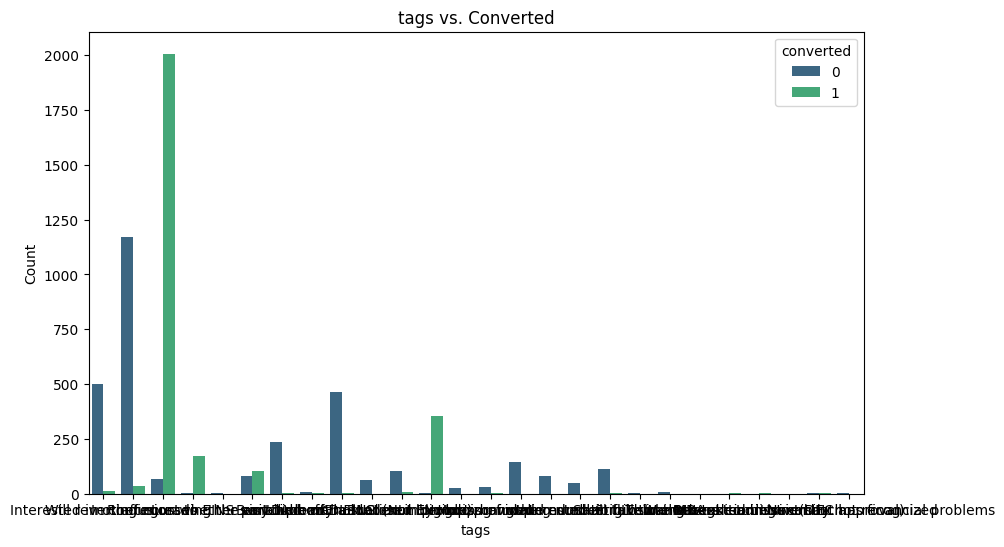

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns
categorical_columns = ['what_matters_most_to_you_in_choosing_a_course', 'tags']

# Plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='converted', data=df, palette='viridis')
    plt.title(f'{column} vs. Converted')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


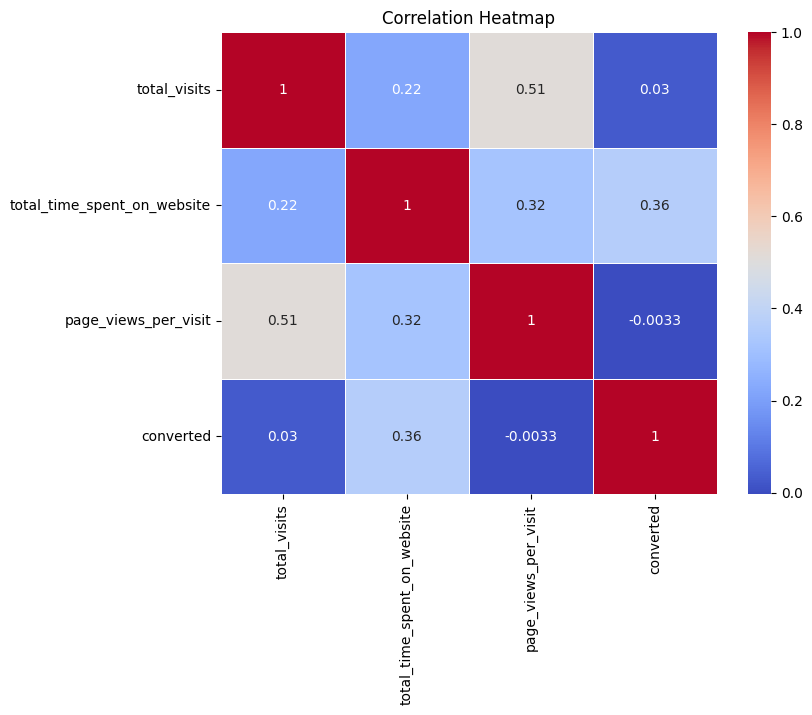

In [54]:
# Calculate correlation matrix
correlation_matrix = analysis_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [55]:
import pandas as pd
from sklearn.impute import SimpleImputer

df_categorical_missing = df[cols_with_missing]

# Instantiate the SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in categorical columns
df_categorical_imputed = pd.DataFrame(imputer.fit_transform(df_categorical_missing), columns=cols_with_missing)

df[cols_with_missing] = df_categorical_imputed

In [57]:
df_categorical_imputed

,lead_profile,lead_quality,what_matters_most_to_you_in_choosing_a_course,tags
0,None,Low in Relevance,Better Career Prospects,Interested in other courses
1,None,Might be,Better Career Prospects,Ringing
2,Potential Lead,Might be,Better Career Prospects,Will revert after reading the email
3,None,Not Sure,Better Career Prospects,Ringing
4,None,Might be,Better Career Prospects,Will revert after reading the email
...,...,...,...,...
9235,Potential Lead,High in Relevance,Better Career Prospects,Will revert after reading the email
9236,Potential Lead,Might be,Better Career Prospects,wrong number given
9237,Potential Lead,Not Sure,Better Career Prospects,invalid number
9238,None,Might be,Better Career Prospects,Will revert after reading the email


In [58]:
df[analysis_cols].isnull().sum()

total_visits                                     137
total_time_spent_on_website                        0
page_views_per_visit                             137
converted                                          0
what_matters_most_to_you_in_choosing_a_course      0
tags                                               0
dtype: int64

In [59]:
# as the count of total_visits is small - we will drop the records with nan values 

df = df.loc[df['total_visits'].isnull()==False]
df = df.loc[df['page_views_per_visit'].isnull()==False]

df[analysis_cols].isnull().sum()

total_visits                                     0
total_time_spent_on_website                      0
page_views_per_visit                             0
converted                                        0
what_matters_most_to_you_in_choosing_a_course    0
tags                                             0
dtype: int64

In [60]:
analysis_df.columns

Index(['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
       'converted'],
      dtype='object')

here, all the categorical cols are excluded from analysis as the features with moderate to strong correlation - had high instances of null values

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'analysis_df' is your DataFrame
# Extract features (X) and target variable (y)
X = df[['total_visits', 'total_time_spent_on_website', 'page_views_per_visit']]
y = df['converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training set
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')


Accuracy: 0.7287
Confusion Matrix:
[[1031  129]
 [ 365  296]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1160
           1       0.70      0.45      0.55       661

    accuracy                           0.73      1821
   macro avg       0.72      0.67      0.68      1821
weighted avg       0.72      0.73      0.71      1821



In [63]:
predictors = list(set(analysis_cols) - {'converted'})

predictors

['tags',
 'page_views_per_visit',
 'total_visits',
 'what_matters_most_to_you_in_choosing_a_course',
 'total_time_spent_on_website']

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'analysis_df' is your DataFrame
# Extract features (X) and target variable (y)
X = df[['total_visits', 'total_time_spent_on_website', 'page_views_per_visit',
                 'what_matters_most_to_you_in_choosing_a_course', 'tags']]
y = df['converted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = ['total_visits', 'total_time_spent_on_website', 'page_views_per_visit']
categorical_features = ['what_matters_most_to_you_in_choosing_a_course', 'tags']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Create a column transformer to apply transformers to respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with the preprocessor and logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')


Accuracy: 0.8177
Confusion Matrix:
[[1069   91]
 [ 241  420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1160
           1       0.82      0.64      0.72       661

    accuracy                           0.82      1821
   macro avg       0.82      0.78      0.79      1821
weighted avg       0.82      0.82      0.81      1821



/Users/varshinibalaji/Documents/DSProjects/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/varshinibalaji/Documents/DSProjects/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define numerical and categorical features
numerical_features = ['total_visits', 'total_time_spent_on_website', 'page_views_per_visit']
categorical_features = ['what_matters_most_to_you_in_choosing_a_course', 'tags']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Create a column transformer to apply transformers to respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with the preprocessor and logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increase max_iter value
])

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')


Accuracy: 0.8177
Confusion Matrix:
[[1069   91]
 [ 241  420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1160
           1       0.82      0.64      0.72       661

    accuracy                           0.82      1821
   macro avg       0.82      0.78      0.79      1821
weighted avg       0.82      0.82      0.81      1821



/Users/varshinibalaji/Documents/DSProjects/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


As we can see including the categorical variables after imputing them with mode - most frequent values,improves the model performance

Performance Metrics

Input Features - 

 - Categorical features selected based on correlation after null value imputation - ['what_matters_most_to_you_in_choosing_a_course', 'tags']
 
- Numerical features selected based on moderate to strong correlation - ['total_visits', 'total_time_spent_on_website', 'page_views_per_visit']
- Precision - 0.82
- Recall - 0.92
- F1 Score - 0.82

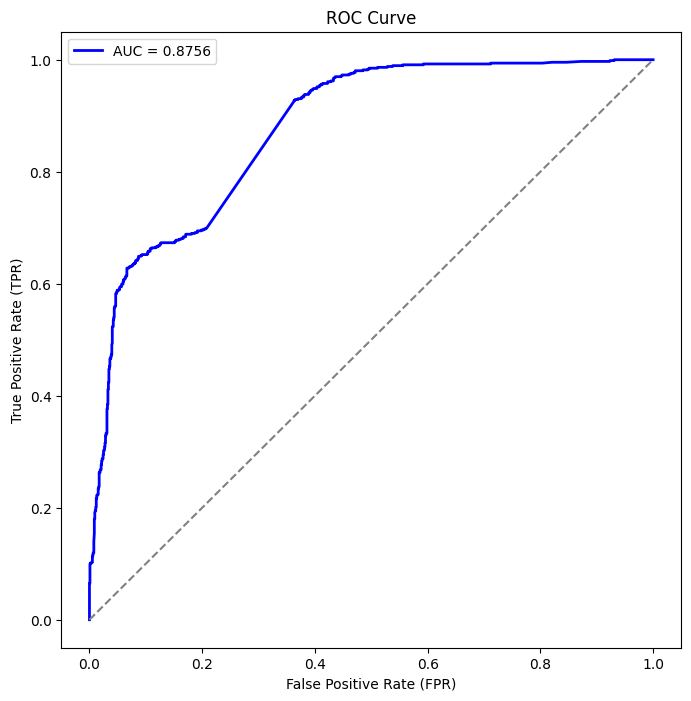

In [240]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


```AUC Score of 0.8756 - depicts a high predictive power of the LogisticRegression model for this data sample```


### Subjective Questions

1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'analysis_df' is your DataFrame
# Assuming 'X' and 'y' are your features and target variable

# Define numerical and categorical features
numerical_features = ['total_visits', 'total_time_spent_on_website', 'page_views_per_visit']
categorical_features = ['what_matters_most_to_you_in_choosing_a_course', 'tags']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Create a column transformer to apply transformers to respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with the preprocessor and logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Get feature names including one-hot encoded columns
feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features))

# Get the coefficients and their absolute values
coefficients = model.named_steps['classifier'].coef_[0]
absolute_coefficients = abs(coefficients)

# Create a DataFrame to display the absolute coefficients and corresponding features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Absolute Coefficient': absolute_coefficients})

# Display the top features with the highest absolute coefficients
top_features = coefficients_df.nlargest(30, 'Absolute Coefficient')
print(top_features)


                                              Feature  Absolute Coefficient
6                             tags_Closed by Horizzon              6.390429
14                                  tags_Lost to EINS              5.520299
23           tags_Will revert after reading the email              3.027712
5                                           tags_Busy              2.914664
11                      tags_Interested in Next batch              1.747355
13                               tags_Lateral student              1.708576
16                   tags_Not doing further education              1.193583
28                                  tags_switched off              1.022778
1                         total_time_spent_on_website              0.917971
29                            tags_wrong number given              0.860509
26                           tags_number not provided              0.848427
22  tags_Want to take admission but has financial ...              0.778919
18          

/Users/varshinibalaji/Documents/DSProjects/ds_assignments/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/varshinibalaji/Documents/DSProjects/ds_assignments/hot_leads_predictor/hot_leads_predictor_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tags, total_time_spent_on_website, page_views_per_visit

What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

tags_Closed by Horizzon              6.390429
tags_Lost to EINS              5.520299
tags_Will revert after reading the email